<a href="https://www.kaggle.com/anusharaor/coding-quiz?scriptVersionId=85746989" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/icu-quiz/fake_LCICM_bp_data.csv
/kaggle/input/icu-quiz/fake_LCICM_labels.csv


size of training set =  187
size of validation set =  63

Accuracy Score:  0.7936507936507936
Mean Absolute Error: 
 0.20634920634920634
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        43
           1       1.00      0.35      0.52        20

    accuracy                           0.79        63
   macro avg       0.88      0.68      0.69        63
weighted avg       0.84      0.79      0.76        63

[[43  0]
 [13  7]]


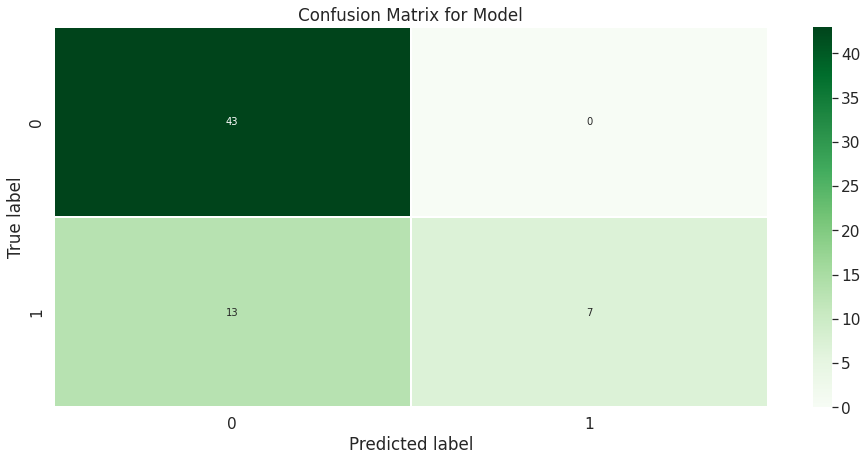

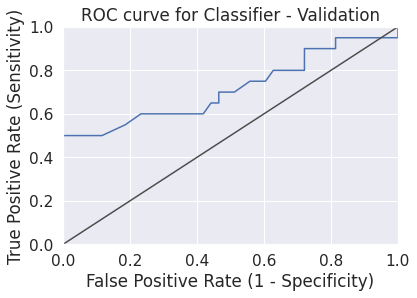

AUC Score for Validation Data: 0.7168604651162791


In [2]:
import csv 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import seaborn as sns
import matplotlib.pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

data_labels = pd.read_csv(r'/kaggle/input/icu-quiz/fake_LCICM_labels.csv')
data_bp = pd.read_csv(r'/kaggle/input/icu-quiz/fake_LCICM_bp_data.csv')


grouped_df = data_bp.groupby("pat_id")
summ_df = grouped_df.max()


merged_df = pd.merge(summ_df, data_labels, on='pat_id')
merged_df.head()

#Select prediction target: y
y = merged_df.label

#Select Features (only one)
data_features = ['blood_pressure']
X = merged_df[data_features]

#Breaking data up into two pieces: training data and validation data 
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
print('size of training set = ',len(train_X))
print('size of validation set = ',len(val_X))
print("")

#Declaring model and fitting
model = LogisticRegression()
model.fit(train_X, train_y)

#Make predictions for validation data
y_pred_quant = model.predict_proba(val_X)[:, 1]
y_pred_val = model.predict(val_X)

#Accuracy Score 
score = accuracy_score(val_y, y_pred_val)
print ("Accuracy Score: ", score )

#Mean Absolute Error
print("Mean Absolute Error: \n", mean_absolute_error(val_y, y_pred_val))

#Classification Report: Precision, Recall, F1 Score
print(classification_report(val_y, y_pred_val))

#Confusion Matrix
cm = confusion_matrix(val_y, y_pred_val)
print(cm)

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2,fmt='g')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Model')
plt.show()

#ROC Curve and AUC Score
from sklearn.metrics import roc_curve
fpr_1, tpr_1, thresholds_1 = roc_curve(val_y, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr_1, tpr_1)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 5)
plt.title('ROC curve for Classifier - Validation', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

from sklearn.metrics import auc
auc_1 = auc(fpr_1, tpr_1)
print("AUC Score for Validation Data:", auc_1)

